In [1]:
using Symbolics

@variables λ
@variables (x(λ))[1:2]
@variables g11(x[1], x[2]) g12(x[1], x[2]) g22(x[1], x[2])


3-element Vector{Num}:
 g11((x(λ))[1], (x(λ))[2])
 g12((x(λ))[1], (x(λ))[2])
 g22((x(λ))[1], (x(λ))[2])

In [2]:
g = [g11 g12; g12 g22]
g_inv = inv(g)

2×2 Matrix{Num}:
    g22((x(λ))[1], (x(λ))[2]) / (g11((x(λ))[1], (x(λ))[2])*g22((x(λ))[1], (x(λ))[2]) - (g12((x(λ))[1], (x(λ))[2])^2))  …  (-g12((x(λ))[1], (x(λ))[2])) / (g11((x(λ))[1], (x(λ))[2])*g22((x(λ))[1], (x(λ))[2]) - (g12((x(λ))[1], (x(λ))[2])^2))
 (-g12((x(λ))[1], (x(λ))[2])) / (g11((x(λ))[1], (x(λ))[2])*g22((x(λ))[1], (x(λ))[2]) - (g12((x(λ))[1], (x(λ))[2])^2))        g11((x(λ))[1], (x(λ))[2]) / (g11((x(λ))[1], (x(λ))[2])*g22((x(λ))[1], (x(λ))[2]) - (g12((x(λ))[1], (x(λ))[2])^2))

In [3]:
Γ = Dict()

for i in 1:2, j in 1:2, k in 1:2
    Γ_ijk = (1//2) * sum(
        g_inv[i, l] * (
            Differential(x[k])(g[l, j]) +
            Differential(x[j])(g[l, k]) -
            Differential(x[l])(g[j, k])
        ) for l in 1:2
    )
    Γ[(i, j, k)] = simplify(Γ_ijk)
end


In [4]:
Γ[1,2,1]

((1//2)*(-Differential((x(λ))[1])(g22((x(λ))[1], (x(λ))[2]))*g12((x(λ))[1], (x(λ))[2]) + g22((x(λ))[1], (x(λ))[2])*Differential((x(λ))[2])(g11((x(λ))[1], (x(λ))[2])))) / (g11((x(λ))[1], (x(λ))[2])*g22((x(λ))[1], (x(λ))[2]) - (g12((x(λ))[1], (x(λ))[2])^2))

In [5]:
dxdλ = Dict();
d2xdλ = Dict();

dxdλ[1] = Differential(λ)(x[1]);
dxdλ[2] = Differential(λ)(x[2]);
d2xdλ[1] = Differential(λ)(dxdλ[1]);
d2xdλ[2] = Differential(λ)(dxdλ[2]);

In [6]:
geodesic_eq = Dict()
for i in 1:2
  geodesic_eq[i] = d2xdλ[i] + sum(Γ[(i, j, k)] * dxdλ[j] * dxdλ[k] for j in 1:2, k in 1:2) ~ 0
end

In [7]:
geodesic_eq[1]

((1//2)*(Differential(λ)((x(λ))[1])^2)*(-(2//1)*Differential((x(λ))[1])(g12((x(λ))[1], (x(λ))[2]))*g12((x(λ))[1], (x(λ))[2]) + g22((x(λ))[1], (x(λ))[2])*Differential((x(λ))[1])(g11((x(λ))[1], (x(λ))[2])) + g12((x(λ))[1], (x(λ))[2])*Differential((x(λ))[2])(g11((x(λ))[1], (x(λ))[2])))) / (g11((x(λ))[1], (x(λ))[2])*g22((x(λ))[1], (x(λ))[2]) - (g12((x(λ))[1], (x(λ))[2])^2)) + ((1//2)*(Differential(λ)((x(λ))[2])^2)*(-Differential((x(λ))[1])(g22((x(λ))[1], (x(λ))[2]))*g22((x(λ))[1], (x(λ))[2]) - Differential((x(λ))[2])(g22((x(λ))[1], (x(λ))[2]))*g12((x(λ))[1], (x(λ))[2]) + (2//1)*Differential((x(λ))[2])(g12((x(λ))[1], (x(λ))[2]))*g22((x(λ))[1], (x(λ))[2]))) / (g11((x(λ))[1], (x(λ))[2])*g22((x(λ))[1], (x(λ))[2]) - (g12((x(λ))[1], (x(λ))[2])^2)) + (Differential(λ)((x(λ))[2])*(-Differential((x(λ))[1])(g22((x(λ))[1], (x(λ))[2]))*g12((x(λ))[1], (x(λ))[2]) + g22((x(λ))[1], (x(λ))[2])*Differential((x(λ))[2])(g11((x(λ))[1], (x(λ))[2])))*Differential(λ)((x(λ))[1])) / (g11((x(λ))[1], (x(λ))[2])*g22((x

In [8]:
expand_derivatives(simplify(substitute(geodesic_eq[1], Dict(g11 => 1, g12 => 0, g22 => 1))))

Differential(λ)(Differential(λ)((x(λ))[1])) ~ 0

In [9]:
expand_derivatives(simplify(substitute(geodesic_eq[2], Dict(g11 => 1, g12 => 0, g22 => 1))))

Differential(λ)(Differential(λ)((x(λ))[2])) ~ 0

In [10]:
for i in 1:2, j in 1:2, k in 1:2
  zz = simplify(expand_derivatives(substitute(Γ[(i, j, k)], Dict(g11 => 1, g12 => 0, g22 => 1))))
  println("(", i, j, k, ") ", zz)
end

(111) 0//1
(112) 0//1
(121) 0//1
(122) 0//1
(211) 0//1
(212) 0//1
(221) 0//1
(222) 0//1


In [11]:
for i in 1:2, j in 1:2, k in 1:2
  zz = simplify(expand_derivatives(substitute(Γ[(i, j, k)], Dict(g11 => 1, g12 => 0, g22 => sin(x[1])*sin(x[1])))))
  println("(", i, j, k, ") ", zz)
end

(111) 0//1
(112) 0//1
(121) 0//1
(122) (-1//2)*sin(2(x(λ))[1])
(211) 0//1
(212) cos((x(λ))[1]) / sin((x(λ))[1])
(221) cos((x(λ))[1]) / sin((x(λ))[1])
(222) 0//1


In [12]:
eq1 = expand_derivatives(simplify(substitute(geodesic_eq[1], Dict(g11 => 1, g12 => 0, g22 => sin(x[1])*sin(x[1])))))

Differential(λ)(Differential(λ)((x(λ))[1])) - (Differential(λ)((x(λ))[2])^2)*sin((x(λ))[1])*cos((x(λ))[1]) ~ 0

In [13]:
eq2 = expand_derivatives(simplify(substitute(geodesic_eq[2], Dict(g11 => 1, g12 => 0, g22 => sin(x[1])*sin(x[1])))))

((sin((x(λ))[1])^2)*Differential(λ)(Differential(λ)((x(λ))[2])) + 2Differential(λ)((x(λ))[2])*Differential(λ)((x(λ))[1])*sin((x(λ))[1])*cos((x(λ))[1])) / (sin((x(λ))[1])^2) ~ 0

In [14]:
using DifferentialEquations

function f(du, u, p, t)
    du[1] = u[3]        # du/dt = v
    du[2] = u[4]       # dv/dt = -u
    du[3] = u[4] * sin(u[1]) * cos(u[1])
    du[4] = - 2 * u[3] * u[4] * cos(u[1]) / sin(u[1])
end

u0 = [0.01, 0.01, 0.01, 0.01]         # 初期値
tspan = (0.0, 10.0)

prob = ODEProblem(f, u0, tspan)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 13-element Vector{Float64}:
  0.0
  0.08112834674795151
  0.23353546976436979
  0.434913931934129
  0.7081556886008231
  1.0670251492157539
  1.542086085120319
  2.166270518626874
  2.990952246856431
  4.08266438258908
  5.537208442001157
  7.4858880412864455
 10.0
u: 13-element Vector{Vector{Float64}}:
 [0.01, 0.01, 0.01, 0.01]
 [0.010811603979177468, 0.010750391782393783, 0.010007799907036647, 0.008555042801497978]
 [0.012337890864484917, 0.01189298474885586, 0.010020985406447701, 0.0065694002069281165]
 [0.014357461852196609, 0.013029883962045718, 0.010036100325399522, 0.004851321413297891]
 [0.017102191958223188, 0.014142794625105756, 0.010053513947378473, 0.0034191989898724943]
 [0.0207136157880688, 0.01515598562332795, 0.010072549484320077, 0.0023309659593515426]
 [0.02550376029855549, 0.0160554442795349, 0.010093177592903929, 0.001537699507845

In [15]:
using Plots

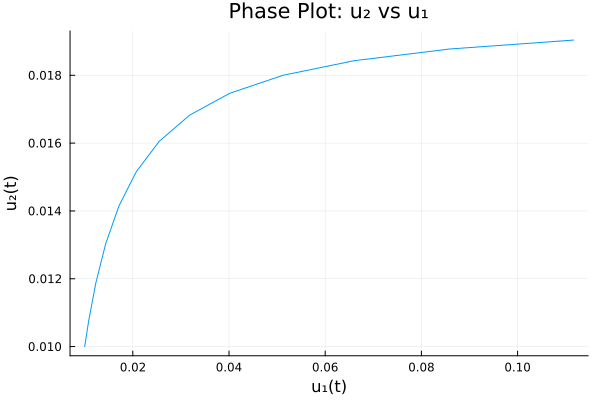

In [16]:
plot(sol[1, :], sol[2, :], xlabel="u₁(t)", ylabel="u₂(t)", title="Phase Plot: u₂ vs u₁", legend=false)


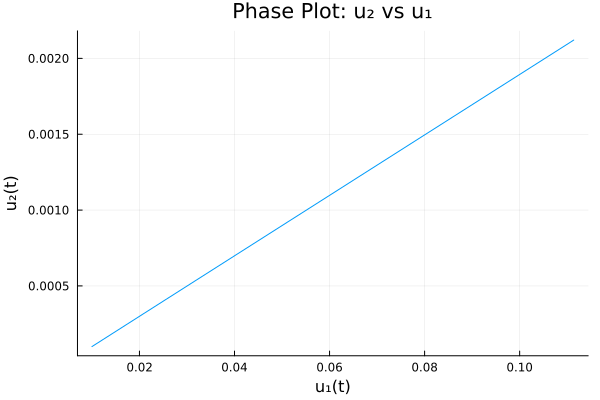

In [17]:
plot(sin.(sol[1, :]) .* cos.(sol[2, :]), sin.(sol[1, :]) .* sin.(sol[2, :]), xlabel="u₁(t)", ylabel="u₂(t)", title="Phase Plot: u₂ vs u₁", legend=false)


In [18]:
eq1 = expand_derivatives(simplify(substitute(geodesic_eq[1], Dict(g11 => 1, g12 => 0, g22 => x[2]))))

Differential(λ)(Differential(λ)((x(λ))[1])) ~ 0

In [19]:
eq2 = expand_derivatives(simplify(substitute(geodesic_eq[2], Dict(g11 => 1, g12 => 0, g22 => x[2]))))

((x(λ))[2]*Differential(λ)(Differential(λ)((x(λ))[2])) + (1//2)*(Differential(λ)((x(λ))[2])^2)) / (x(λ))[2] ~ 0

In [20]:
using DifferentialEquations

function f(du, u, p, t)
    du[1] = u[3]
    du[2] = u[4]
    du[3] = 0
    du[4] = - u[4]^2 / (u[2] * 2)
end

u0 = [0.01, 0.01, 0.2, 1]         # 初期値
tspan = (0.0, 10.0)

prob = ODEProblem(f, u0, tspan)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 21-element Vector{Float64}:
  0.0
  0.01792963630582741
  0.02598592270317033
  0.04500160837941955
  0.06364459155166115
  0.09428874893945562
  0.1318956160663221
  0.18649437031498006
  0.258889347431957
  0.36003739197390533
  0.49752599700452027
  0.6874439229448418
  0.9476314757966738
  1.3058560833572703
  1.7978541004338549
  2.4746167107172203
  3.4048702902432
  4.684185004066229
  6.443201004142033
  8.862194388463333
 10.0
u: 21-element Vector{Vector{Float64}}:
 [0.01, 0.01, 0.2, 1.0]
 [0.013585927261165481, 0.024092366002767596, 0.2, 0.7496460396295943]
 [0.015197184540634064, 0.029805364938098072, 0.2, 0.6739830710331094]
 [0.01900032167588391, 0.04153404785414956, 0.2, 0.5709574191523845]
 [0.022728918310332226, 0.05159205273617912, 0.2, 0.5122886313625434]
 [0.02885774978789112, 0.06628904064059706, 0.2, 0.45194559183921884]
 [0.0363

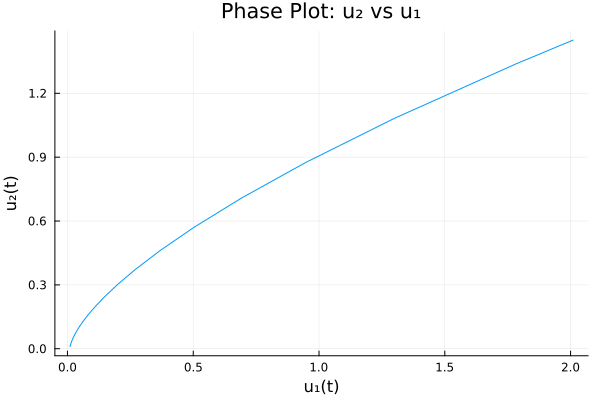

In [21]:
plot(sol[1, :], sol[2, :], xlabel="u₁(t)", ylabel="u₂(t)", title="Phase Plot: u₂ vs u₁", legend=false)


In [22]:
eq1 = expand_derivatives(simplify(substitute(geodesic_eq[1], Dict(g11 => 1, g12 => 0, g22 => -cosh(x[2])*cosh(x[2])))))

Differential(λ)(Differential(λ)((x(λ))[1])) ~ 0

In [23]:
eq1 = expand_derivatives(simplify(substitute(geodesic_eq[2], Dict(g11 => 1, g12 => 0, g22 => -cosh(x[2])*cosh(x[2])))))

((2//1)*(cosh((x(λ))[2])^2)*Differential(λ)(Differential(λ)((x(λ))[2])) + (2//1)*(Differential(λ)((x(λ))[2])^2)*sinh((x(λ))[2])*cosh((x(λ))[2])) / (2(cosh((x(λ))[2])^2)) ~ 0

In [24]:
using DifferentialEquations

function f(du, u, p, t)
    du[1] = u[3]
    du[2] = u[4]
    du[3] = 0
    du[4] = - u[4]^2 * sinh(u[2]) / cosh(u[2])
end

u0 = [0, 0, 0.2, 1]         # 初期値
tspan = (-0, 100)

prob = ODEProblem(f, u0, tspan)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 24-element Vector{Float64}:
   0.0
   0.001382610928611069
   0.015208720214721758
   0.088461354149174
   0.24261377102975554
   0.47355109815813873
   0.7641510901849318
   1.1269565541575524
   1.626093622988836
   2.35411906278122
   3.189697470216665
   4.298066469386093
   5.657845000445747
   7.4526812554750865
   9.705345043483788
  12.674740049486047
  16.442319938029158
  21.400459366360852
  27.730165108054738
  36.04812725281769
  46.708877981348756
  60.704494931347156
  78.69444667032427
 100.0
u: 24-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.2, 1.0]
 [0.0002765221857222137, 0.001382610488108615, 0.2, 0.9999990441948804]
 [0.0030417440429443506, 0.015208133966470196, 0.2, 0.9998843674741291]
 [0.017692270829834794, 0.08834638414150484, 0.2, 0.9961101095654648]
 [0.04852275420595109, 0.24029458961023553, 0.2, 0.971807913259634]
 [0.0

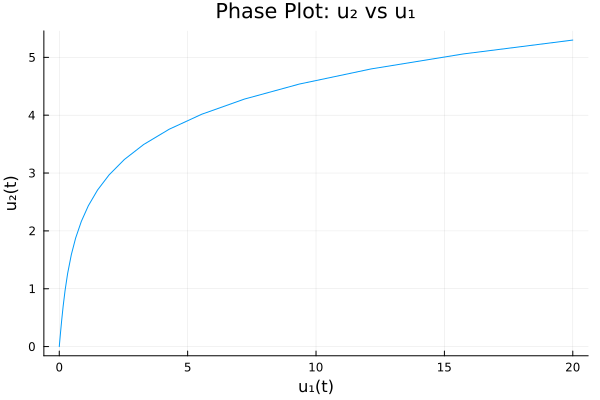

In [25]:
plot(sol[1, :], sol[2, :], xlabel="u₁(t)", ylabel="u₂(t)", title="Phase Plot: u₂ vs u₁", legend=false)


In [26]:
eq1 = expand_derivatives(simplify(substitute(geodesic_eq[1], Dict(g11 => 1/(x[2]^2), g12 => 0, g22 => 1/(x[2]^2)))))

Differential(λ)(Differential(λ)((x(λ))[1])) - 2((x(λ))[2]^3)*Differential(λ)((x(λ))[2])*Differential(λ)((x(λ))[1])*(1 / ((x(λ))[2]^4)) ~ 0

In [27]:
eq1 = expand_derivatives(simplify(substitute(geodesic_eq[2], Dict(g11 => 1/(x[2]^2), g12 => 0, g22 => 1/(x[2]^2)))))

Differential(λ)(Differential(λ)((x(λ))[2])) - ((x(λ))[2]^3)*(Differential(λ)((x(λ))[2])^2)*(1 / ((x(λ))[2]^4)) + ((x(λ))[2]^3)*(Differential(λ)((x(λ))[1])^2)*(1 / ((x(λ))[2]^4)) ~ 0

In [28]:
using DifferentialEquations

function f(du, u, p, t)
    du[1] = u[3]
    du[2] = u[4]
    du[3] = 2 * u[3] * u[4] / u[2]
    du[4] = u[4]^2 / u[2] - u[3]^2 / u[2]
end

u0 = [0.1, 0.01, -0.01, 0.01]         # 初期値
tspan = (0, 10)

prob = ODEProblem(f, u0, tspan)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 23-element Vector{Float64}:
  0.0
  0.08678309912866837
  0.2562895865985975
  0.4619693619166176
  0.6906918078739449
  0.9602543962891756
  1.249485273994736
  1.5209709718438564
  1.853732515280737
  2.1586189238242106
  2.4793854737476355
  2.808893249875064
  3.1698059103453096
  3.5657336639502306
  4.016242932285932
  4.52928480249614
  5.11587368356672
  5.783463075395241
  6.55074891979754
  7.27336697370035
  8.353451713987495
  9.49667784215339
 10.0
u: 23-element Vector{Vector{Float64}}:
 [0.1, 0.01, -0.01, 0.01]
 [0.09905488994435539, 0.010863193267580078, -0.011800896788328127, 0.009836501887361137]
 [0.09674396214329656, 0.012430564338935855, -0.015451889820032368, 0.008383119950554687]
 [0.09317034661923151, 0.013782184480313094, -0.018994861164205172, 0.004369457126214258]
 [0.0886547433459779, 0.014077984464511608, -0.01981917116646

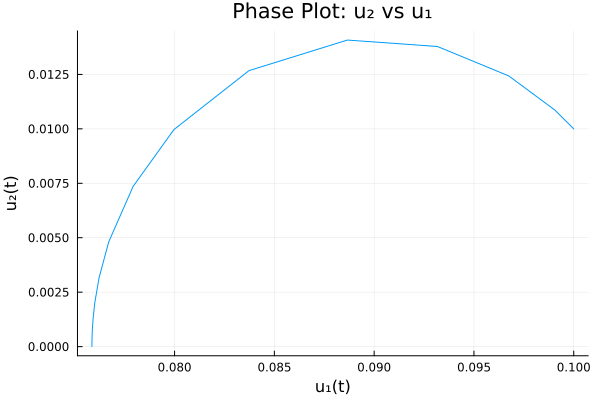

In [29]:
plot(sol[1, :], sol[2, :], xlabel="u₁(t)", ylabel="u₂(t)", title="Phase Plot: u₂ vs u₁", legend=false)
